In [2]:
from sklearn.neighbors import kneighbors_graph
from sklearn import manifold
from sklearn.datasets import load_iris, load_digits
import matplotlib.pyplot as plt
from scipy import sparse 
import numpy as np

In [3]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target


digits = load_digits()
X_digits = digits.data
y_digits = digits.target

In [4]:

def laplacian_eigenmaps(X,y, n_neighbors=4, n_components=3, normilize=True, **kwargs):
    N = X.shape[0]  
    kng = kneighbors_graph(X, n_neighbors, mode='distance')
    W = 0.5 * (kng + kng.T)

    #W = np.where(W > 0, 1, 0)
    D = sparse.diags(np.asarray(W.sum(axis=1)).flatten())

    if normilize:
        title = f"Normalized Laplacian Eigenmaps with {n_neighbors} neighbors"
        Dinv = sparse.linalg.inv(D) 
        Dinv = Dinv.sqrt()
        L = Dinv@( D - W )@Dinv
    else:
        title = f"No Normalized Laplacian Eigenmaps with {n_neighbors} neighbors"

        L = D - W
    if "visualise_laplacien" in kwargs and kwargs["visualise_laplacien"]:
        
        plt.imshow(L.toarray())
        plt.title("Laplacian")
        plt.colorbar()
        plt.show()

    if "datatitle" in kwargs and kwargs["datatitle"]:
        title = f"{title} on {kwargs['datatitle']} dataset"

    [yl, YL] = sparse.linalg.eigsh(L, k=n_components, which='SM')
    plt.scatter(YL[:,-2], YL[:,-1], c=y, cmap=plt.cm.Set1, alpha=.7)
    plt.xlabel(f"Component {n_components-2}")
    plt.ylabel(f"Component {n_components-1}")
    plt.title(title)



/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Ainv = spsolve(A, I)
/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  Ainv = spsolve(A, I)


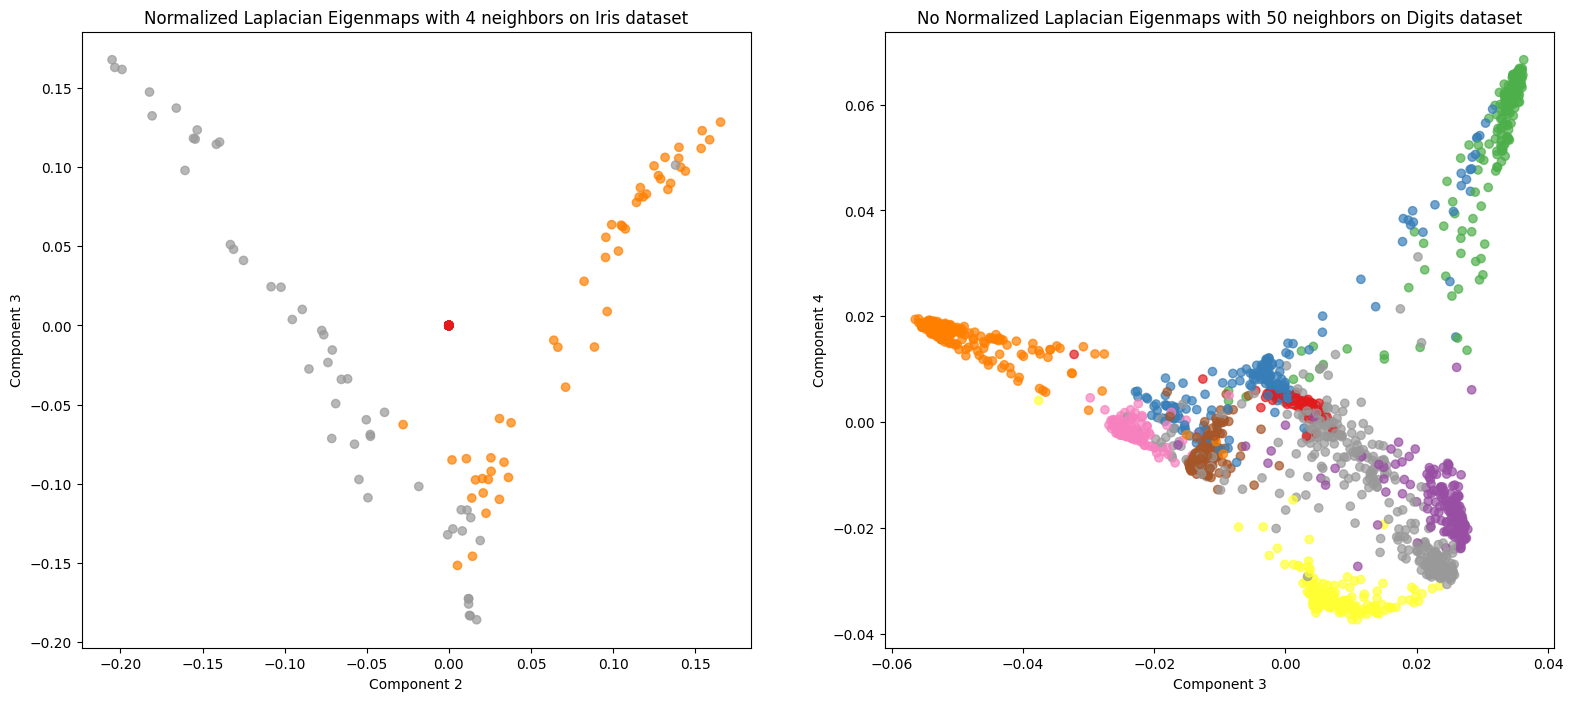

In [5]:
plt.subplots(1,2, figsize=(19,8))

plt.subplot(1,2,1)
laplacian_eigenmaps(X_iris, y_iris, n_neighbors=4, n_components=4, normilize=True, visualise_laplacien=False, datatitle="Iris") 



plt.subplot(1,2,2)
laplacian_eigenmaps(X_digits, y_digits, n_neighbors=50, n_components=5, normilize=False, visualise_laplacien=False, datatitle="Digits")



## Inluence de la normalisation

/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Ainv = spsolve(A, I)
/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  Ainv = spsolve(A, I)


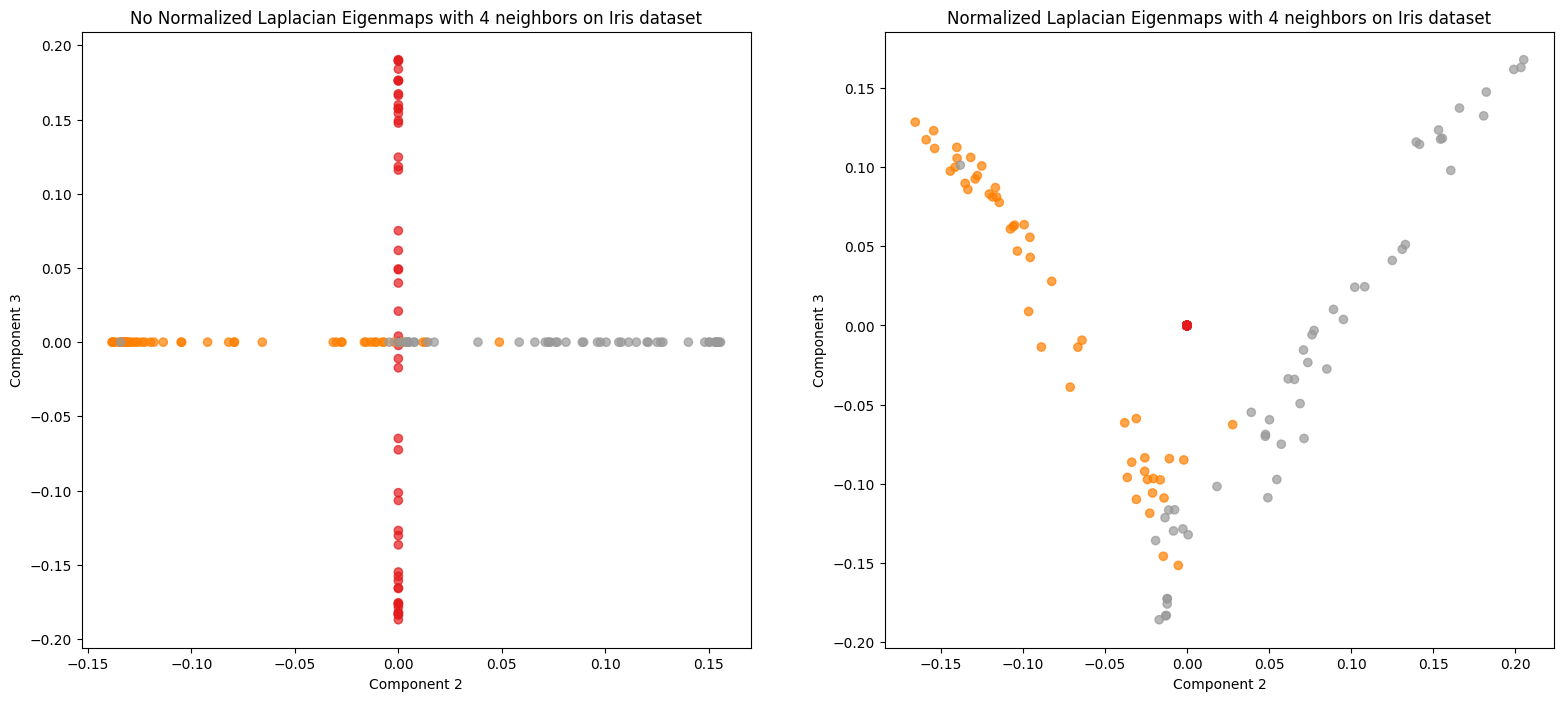

In [6]:
plt.subplots(1,2, figsize=(19,8))

plt.subplot(1,2,1)
laplacian_eigenmaps(X_iris, y_iris, n_neighbors=4, n_components=4, normilize=False, visualise_laplacien=False, datatitle="Iris") 

plt.subplot(1,2,2)
laplacian_eigenmaps(X_iris, y_iris, n_neighbors=4, n_components=4, normilize=True, visualise_laplacien=False, datatitle="Iris") 


/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Ainv = spsolve(A, I)
/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  Ainv = spsolve(A, I)


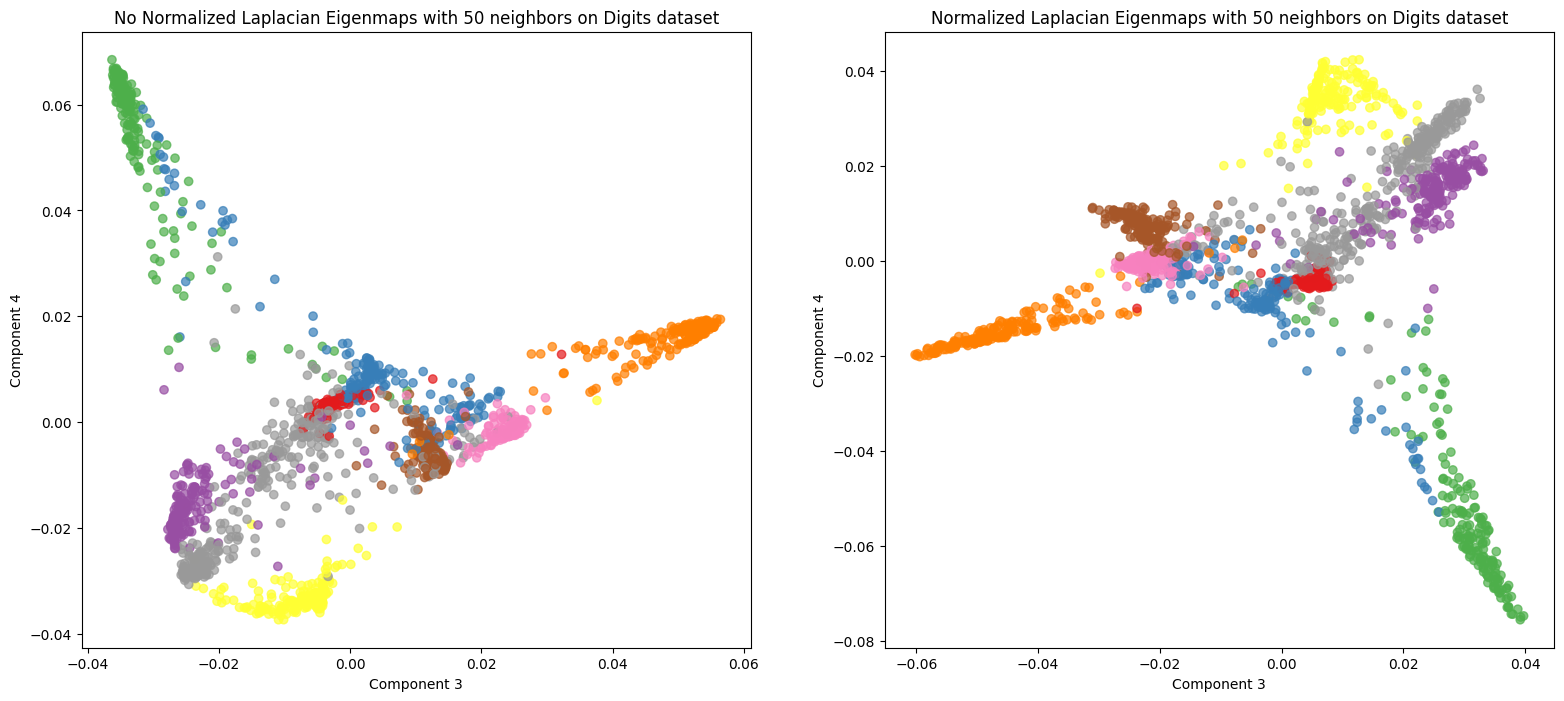

In [7]:
plt.subplots(1,2, figsize=(19,8))
plt.subplot(1,2,1)
laplacian_eigenmaps(X_digits, y_digits, n_neighbors=50, n_components=5, normilize=False, visualise_laplacien=False, datatitle="Digits")

plt.subplot(1,2,2)
laplacian_eigenmaps(X_digits, y_digits, n_neighbors=50, n_components=5, normilize=True, visualise_laplacien=False, datatitle="Digits")

# laplacian_eigenmaps(X_iris, y_iris, 4, normilize=True , visualise_laplacien=False)

## Influence du nombre de voisin

/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Ainv = spsolve(A, I)
/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  Ainv = spsolve(A, I)
/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Ainv = spsolve(A, I)
/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  Ainv = spsolve(A, I)
/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Ainv = spsolve(A, I)
/home/talibe/miniconda3/lib/pytho

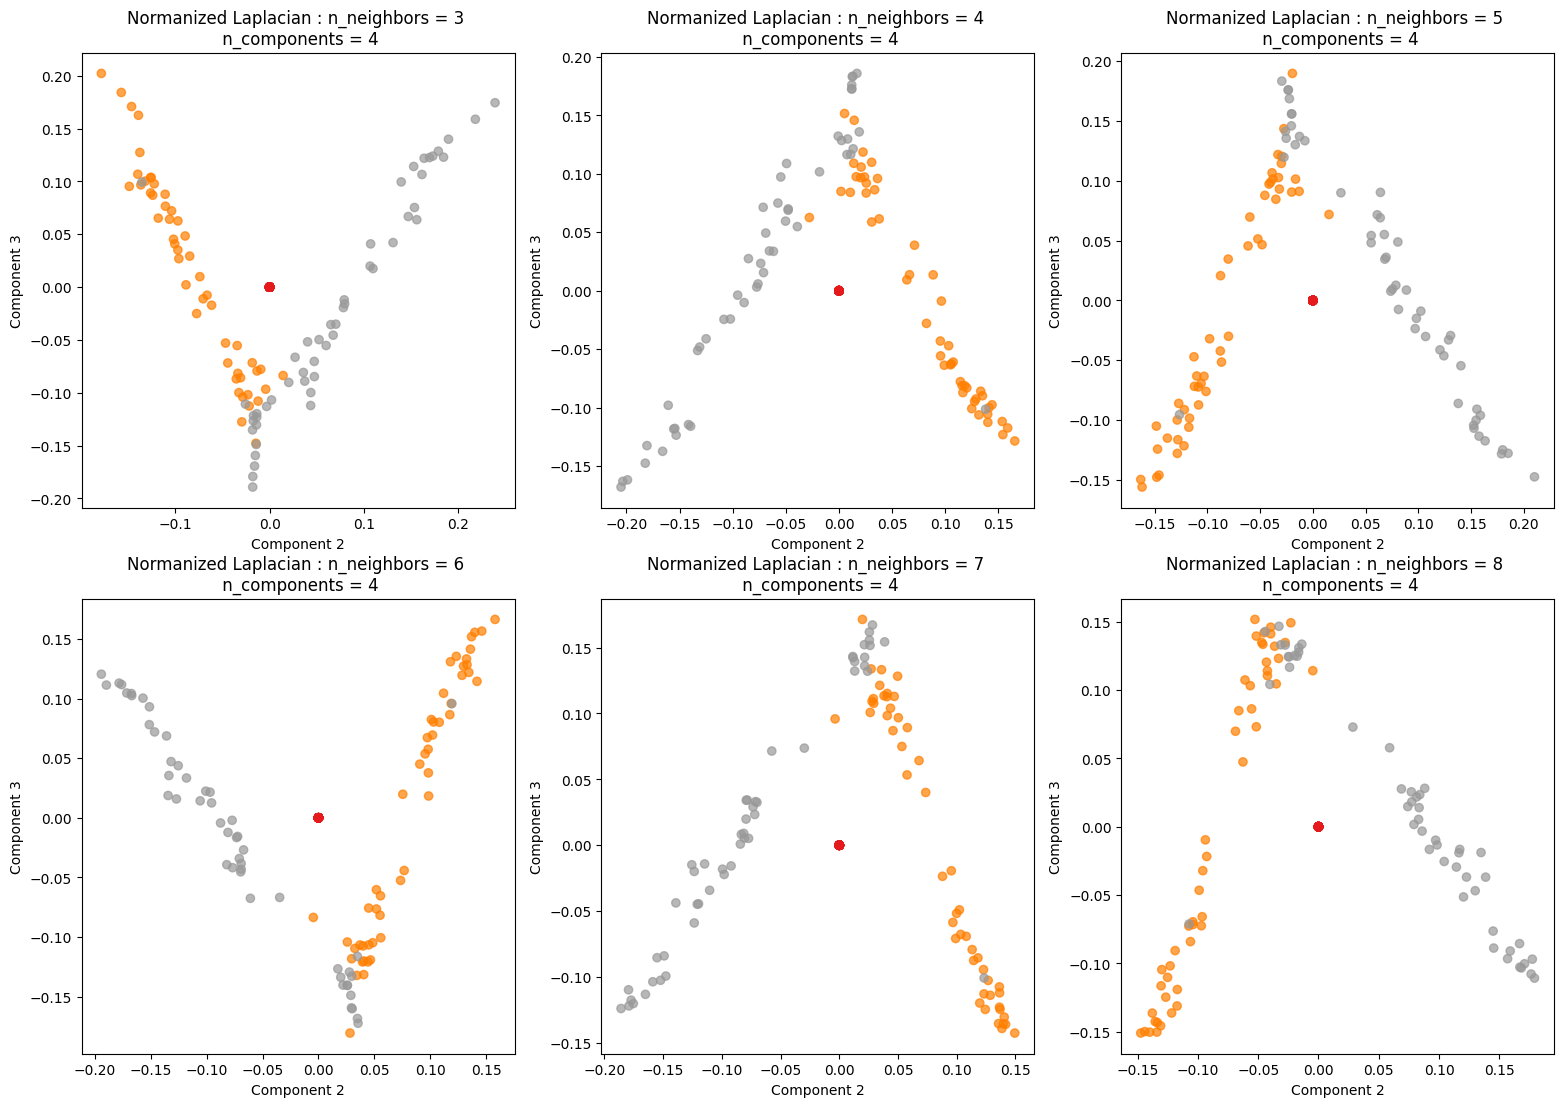

In [8]:
iris_n_neighbors = [3, 4, 5, 6, 7, 8]
plt.subplots(2,3, figsize=(19,13), )
for i, n_neighbors in enumerate(iris_n_neighbors):
    plt.subplot(2,3,i+1)
    laplacian_eigenmaps(X_iris, y_iris, n_neighbors=n_neighbors, n_components=4, normilize=True, visualise_laplacien=False, datatitle="Iris") 
    plt.title(f"Normanized Laplacian : n_neighbors = {n_neighbors} \n n_components = 4")

/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Ainv = spsolve(A, I)
/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  Ainv = spsolve(A, I)
/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Ainv = spsolve(A, I)
/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  Ainv = spsolve(A, I)
/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Ainv = spsolve(A, I)
/home/talibe/miniconda3/lib/pytho

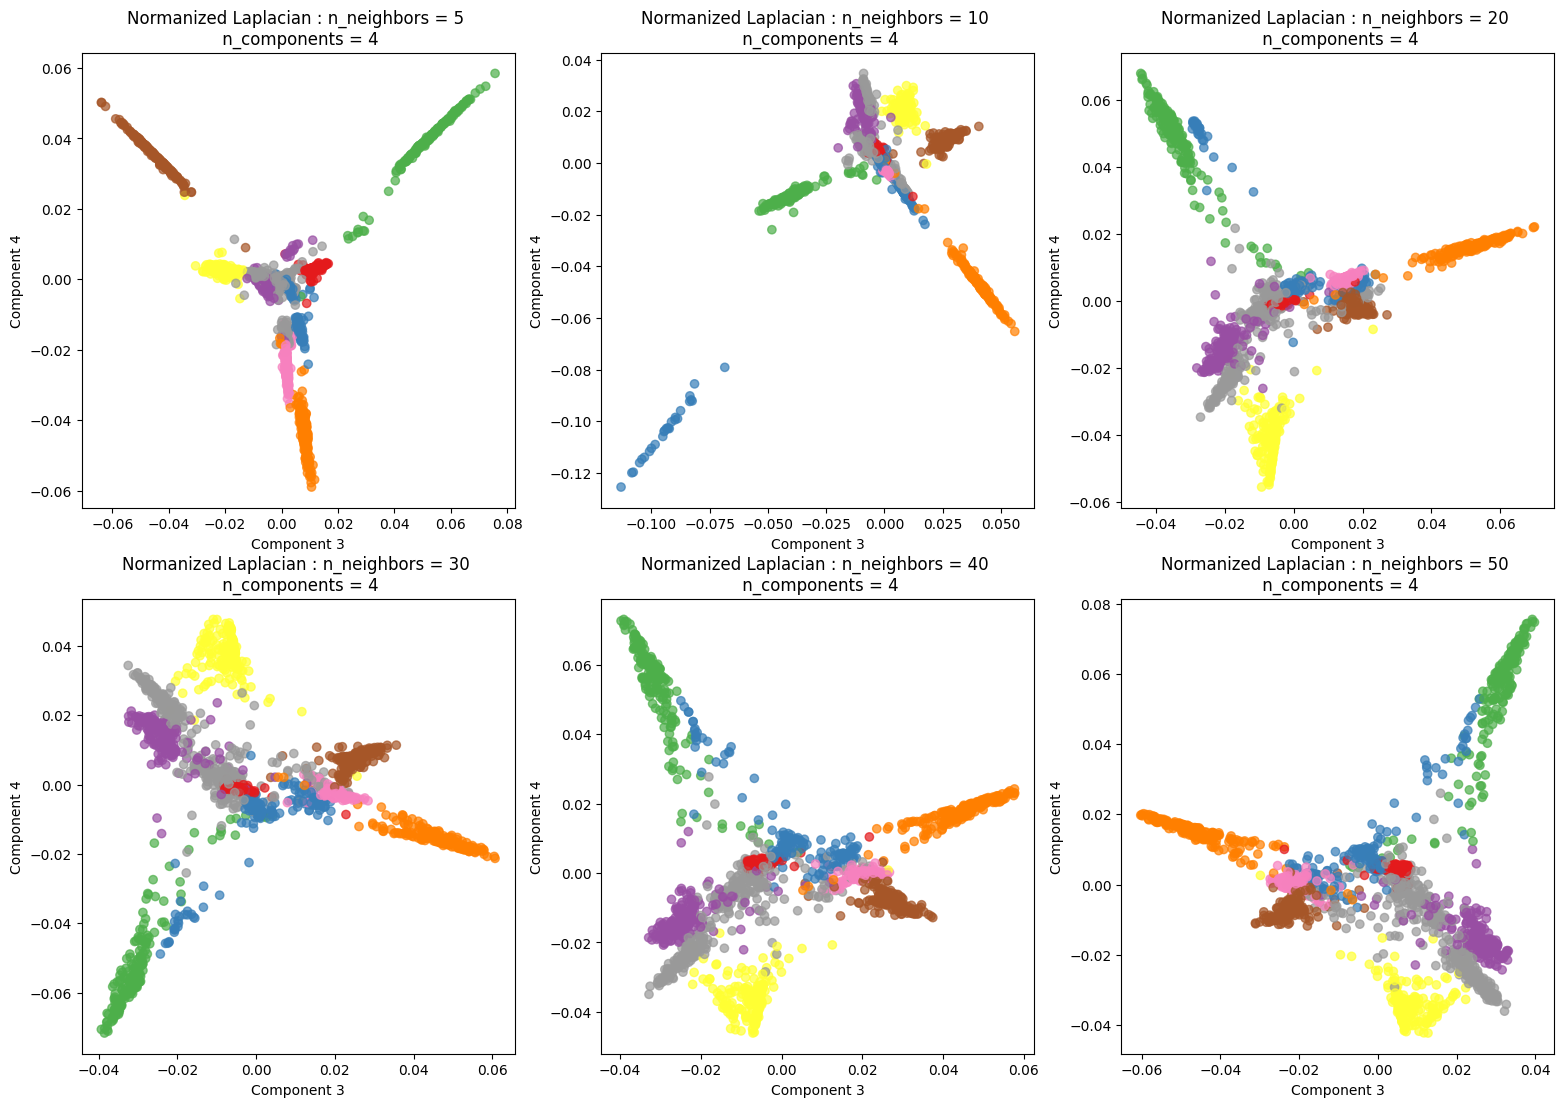

/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Ainv = spsolve(A, I)
/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  Ainv = spsolve(A, I)
/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Ainv = spsolve(A, I)
/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  Ainv = spsolve(A, I)
/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Ainv = spsolve(A, I)
/home/talibe/miniconda3/lib/pytho

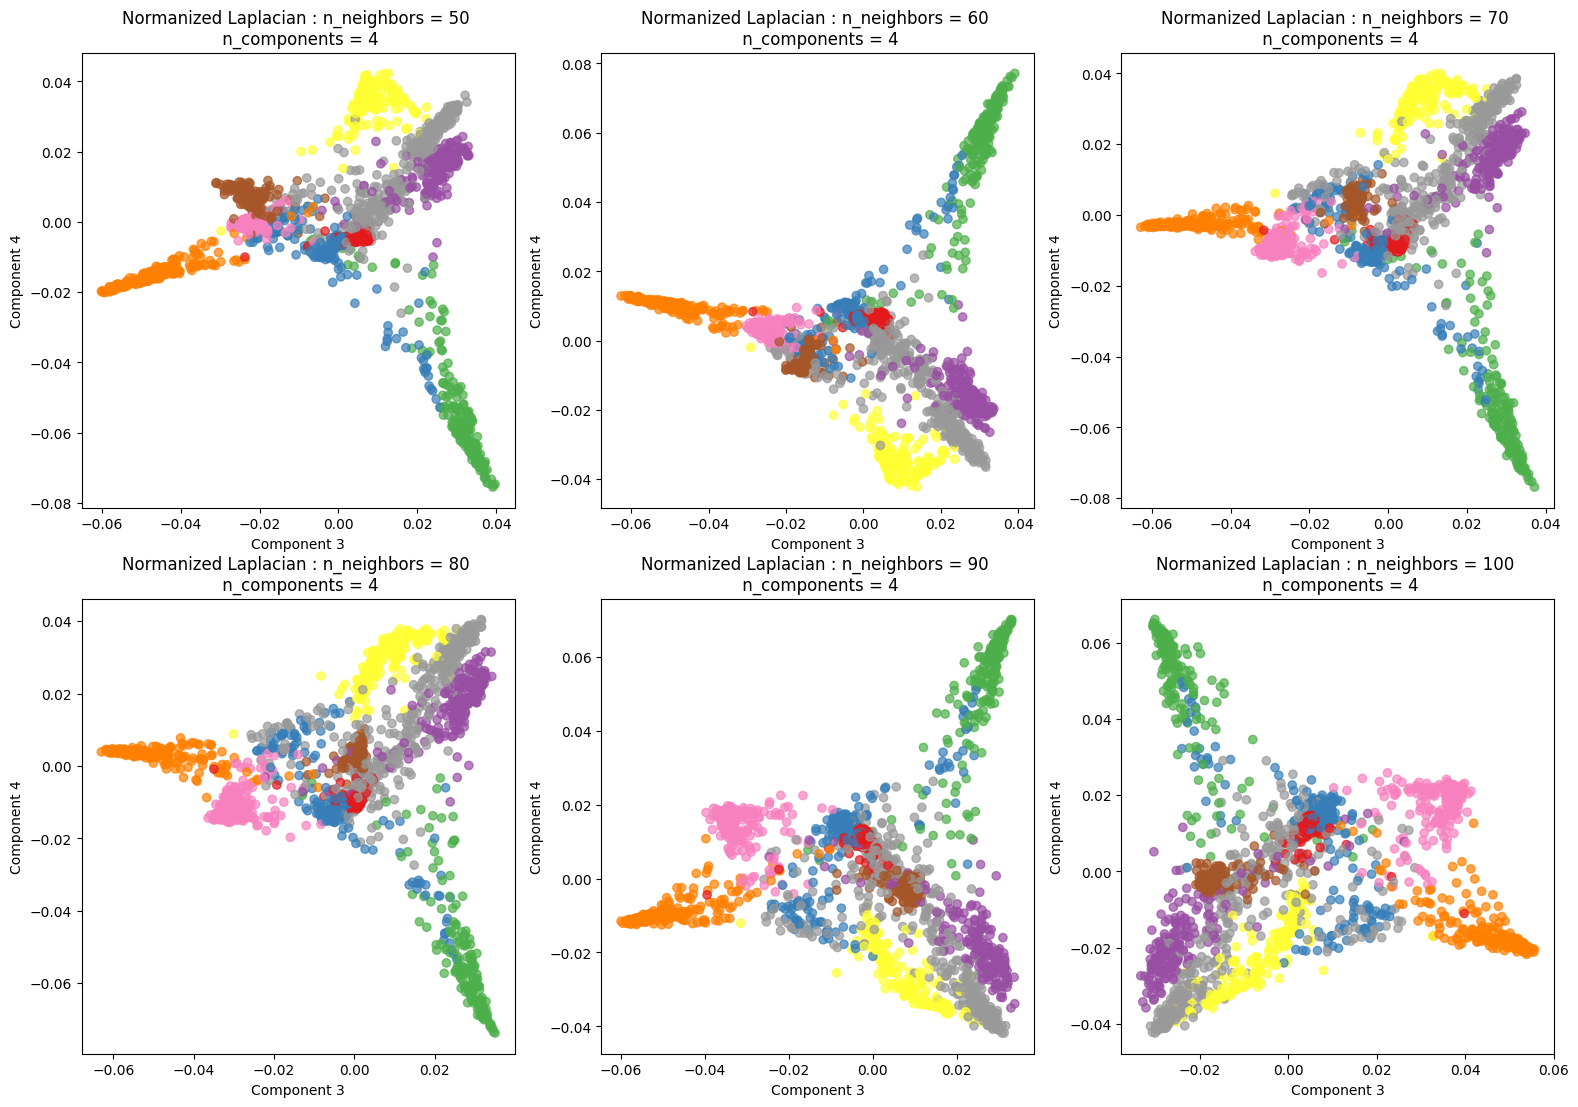

In [9]:
mnist_n_neighbors = [5, 10, 20, 30, 40, 50]
plt.subplots(2,3, figsize=(19,13), )
for i, n_neighbors in enumerate(mnist_n_neighbors):
    plt.subplot(2,3,i+1)
    laplacian_eigenmaps(X_digits , y_digits, n_neighbors=n_neighbors, n_components=5, i=3, j=4, normilize=True, visualise_laplacien=False, datatitle="Iris") 
    plt.title(f"Normanized Laplacian : n_neighbors = {n_neighbors} \n n_components = 4")

plt.show()

mnist_n_neighbors = [50, 60, 70, 80, 90, 100]
plt.subplots(2,3, figsize=(19,13), )
for i, n_neighbors in enumerate(mnist_n_neighbors):
    plt.subplot(2,3,i+1)
    laplacian_eigenmaps(X_digits , y_digits, n_neighbors=n_neighbors, n_components=5, i=3, j=4, normilize=True, visualise_laplacien=False, datatitle="Iris") 
    plt.title(f"Normanized Laplacian : n_neighbors = {n_neighbors} \n n_components = 4")

## Comparaison avec scikit-learn

### Sur Iris

/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Ainv = spsolve(A, I)
/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  Ainv = spsolve(A, I)
/home/talibe/miniconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


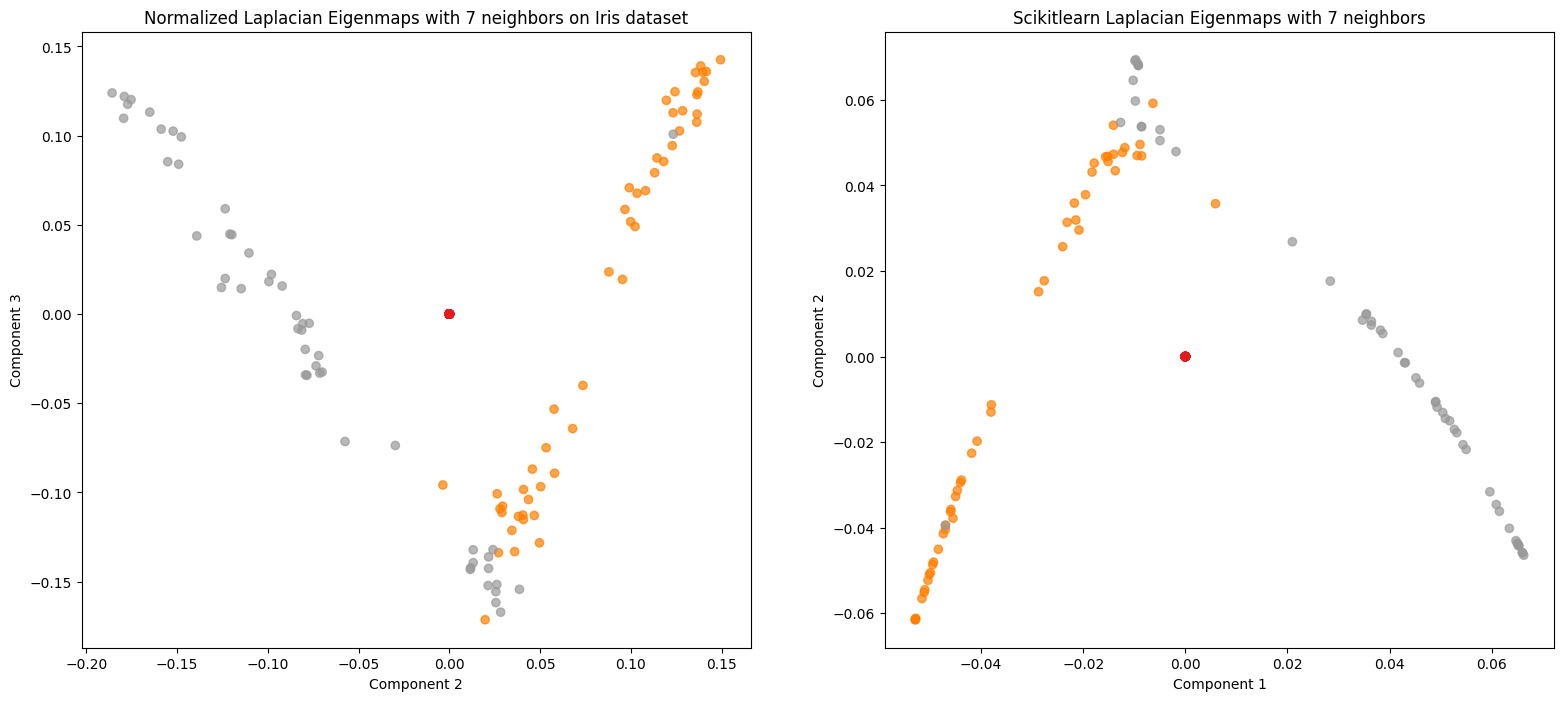

In [10]:
plt.subplots(1,2, figsize=(19,8))
plt.subplot(1,2,1)
laplacian_eigenmaps(X_iris, y_iris, n_neighbors=7, n_components=4, normilize=True, visualise_laplacien=False, datatitle="Iris")

plt.subplot(1,2,2)

Lap_Eig = manifold.SpectralEmbedding(   n_components=5,
                                        affinity='nearest_neighbors',
                                        random_state=0,
                                        n_neighbors=7,
                                        eigen_solver="arpack")

YL = Lap_Eig.fit_transform(X_iris)

plt.scatter(YL[:,1], YL[:,2], c=y_iris, cmap=plt.cm.Set1, alpha=.7)
plt.title(f"Scikitlearn Laplacian Eigenmaps with {7} neighbors")
plt.xlabel(f"Component {1}")
plt.ylabel(f"Component {2}")
plt.show()

### Sur mnist

/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Ainv = spsolve(A, I)
/home/talibe/miniconda3/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  Ainv = spsolve(A, I)


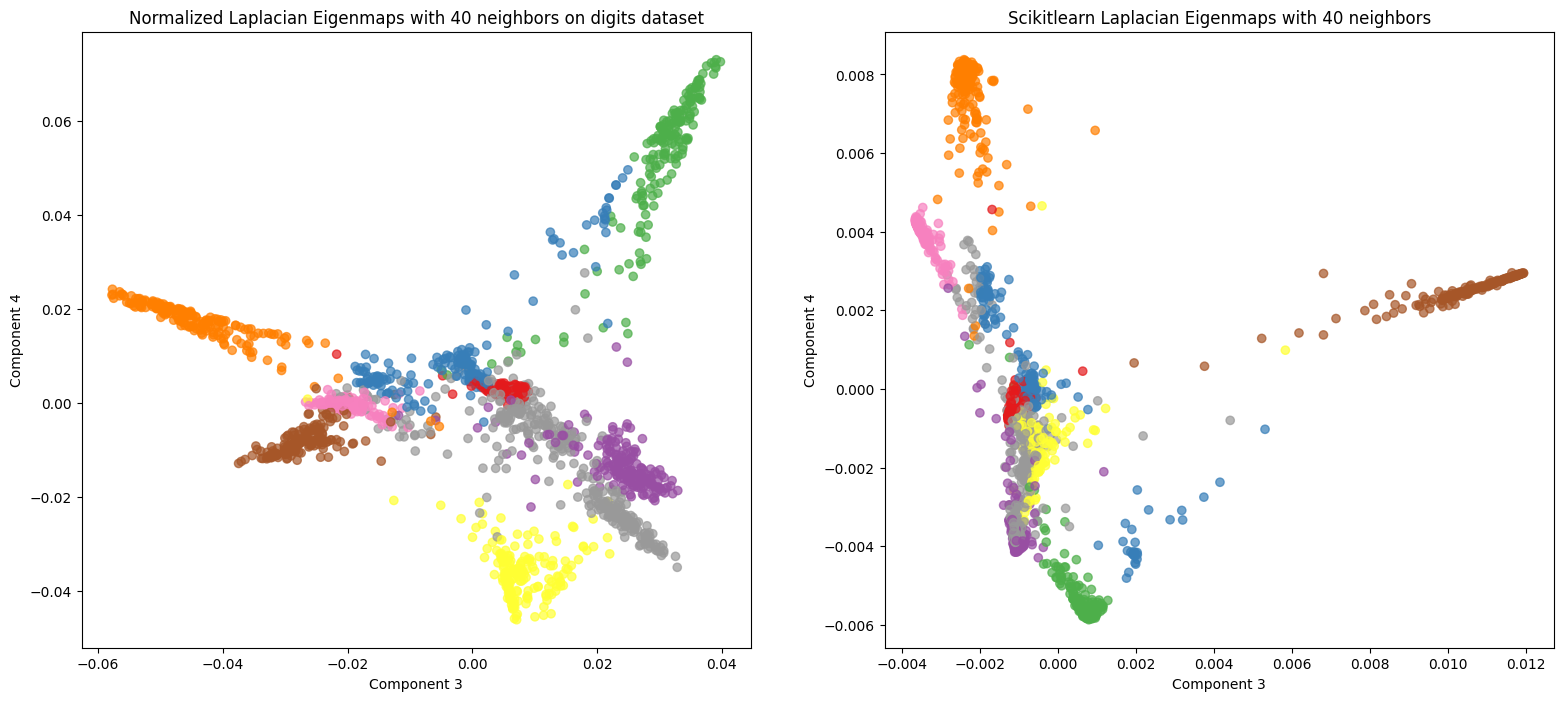

In [11]:
plt.subplots(1,2, figsize=(19,8))
plt.subplot(1,2,1)
laplacian_eigenmaps(X_digits, y_digits, n_neighbors=40, n_components=5, normilize=True, visualise_laplacien=False, datatitle="digits")

plt.subplot(1,2,2)

Lap_Eig = manifold.SpectralEmbedding(   n_components=5,
                                    affinity='nearest_neighbors',
                                    random_state=0,
                                    n_neighbors=40,
                                    eigen_solver="arpack")

YL = Lap_Eig.fit_transform(X_digits)

plt.scatter(YL[:,1], YL[:,2], c=y_digits, cmap=plt.cm.Set1, alpha=.7)
plt.title(f"Scikitlearn Laplacian Eigenmaps with {40} neighbors")
plt.xlabel(f"Component {3}")
plt.ylabel(f"Component {4}")
plt.show()